## KNN算法原理

计算测试集中样本与训练集中每个样本的距离，取前k个距离最小的训练样本，最后选择这k个样本中出现最多的分类，作为测试样本的分类。

## 分类案例

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 生成数据
from sklearn.datasets.samples_generator import make_blobs
centers = [[-2, 2], [2, 2], [0, 4]]
X, y = make_blobs(n_samples=60, centers=centers, random_state=0, cluster_std=0.60)

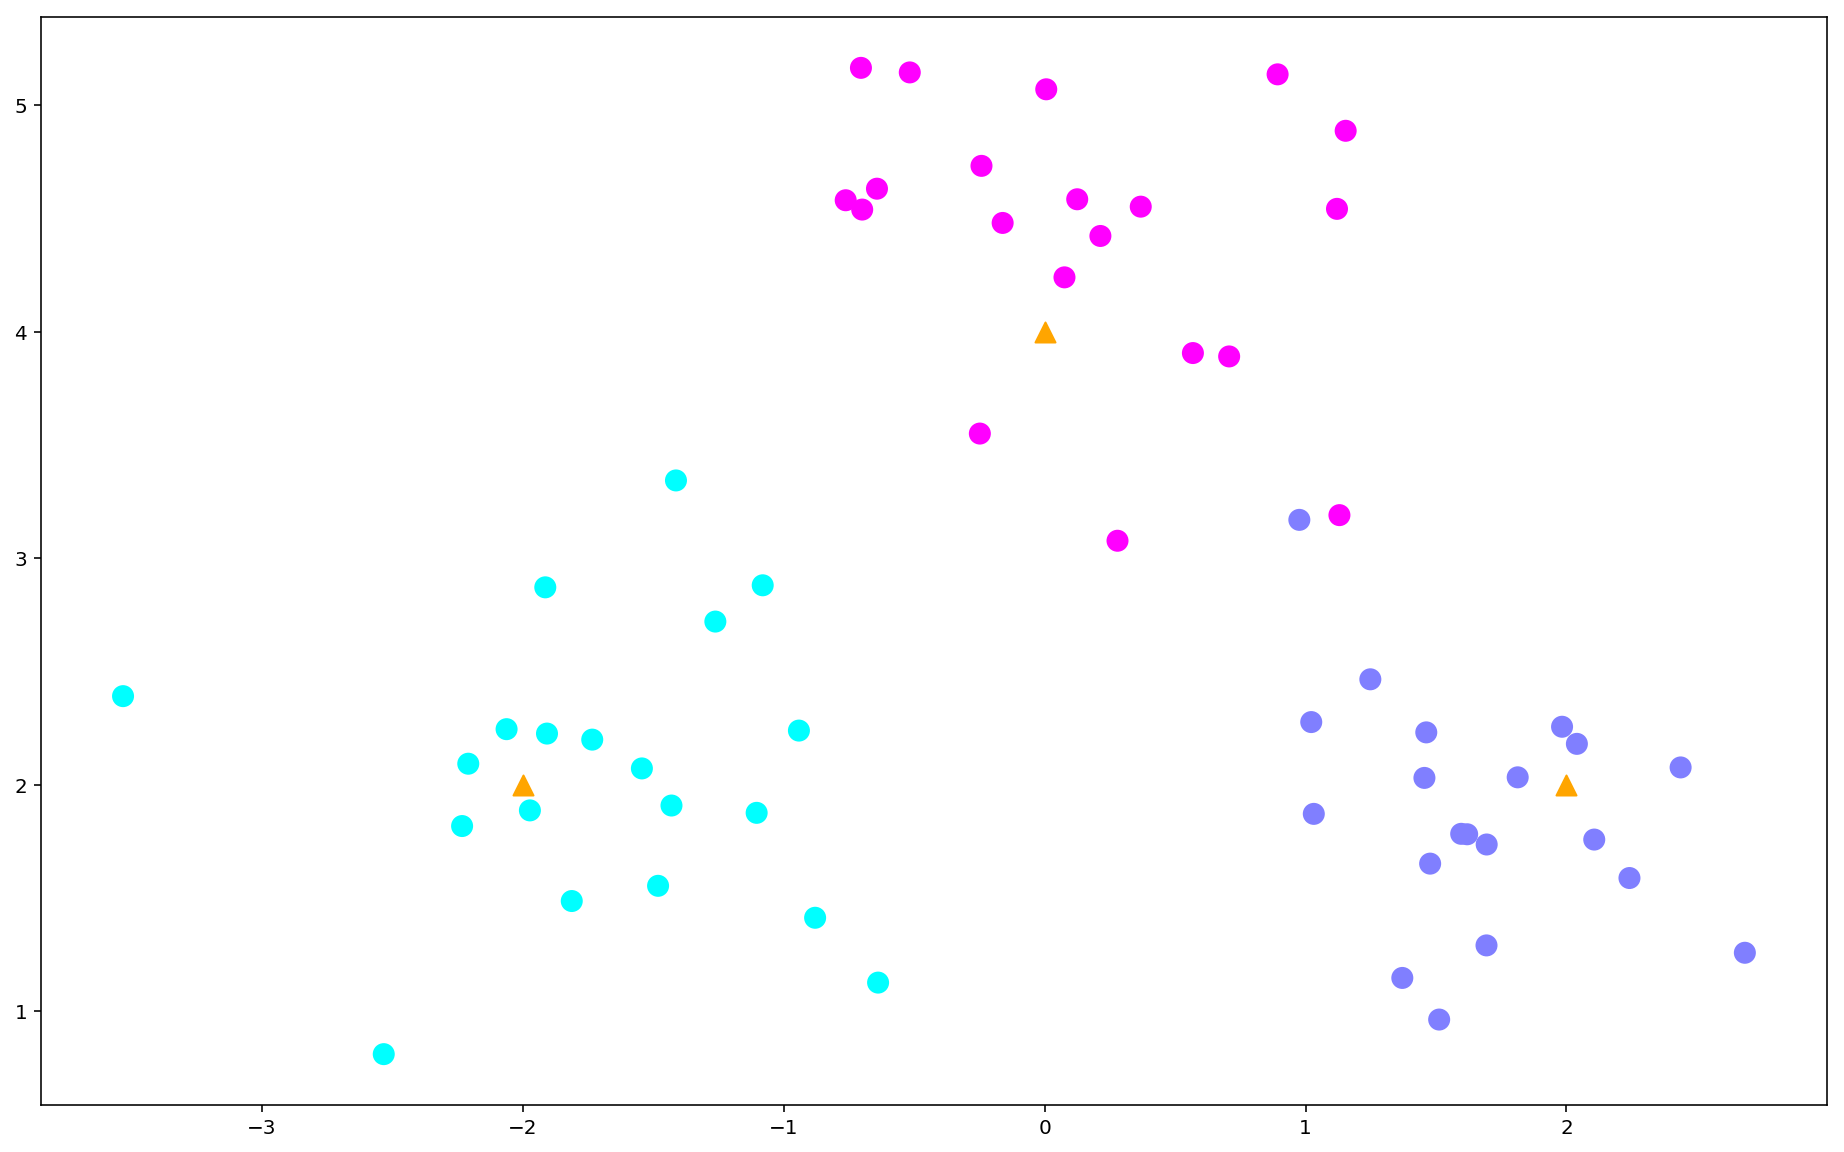

In [3]:
plt.figure(figsize=(16, 10), dpi=144)
c = np.array(centers)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='cool')
plt.scatter(c[:, 0], c[:, 1], s=100, marker='^', c='orange')

### 建立模型

In [4]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
X_sample = [[0, 2]]
y_sample = clf.predict(X_sample)
neighbors = clf.kneighbors(X_sample, return_distance=False)
neighbors

array([[16, 20, 48,  6, 23]])

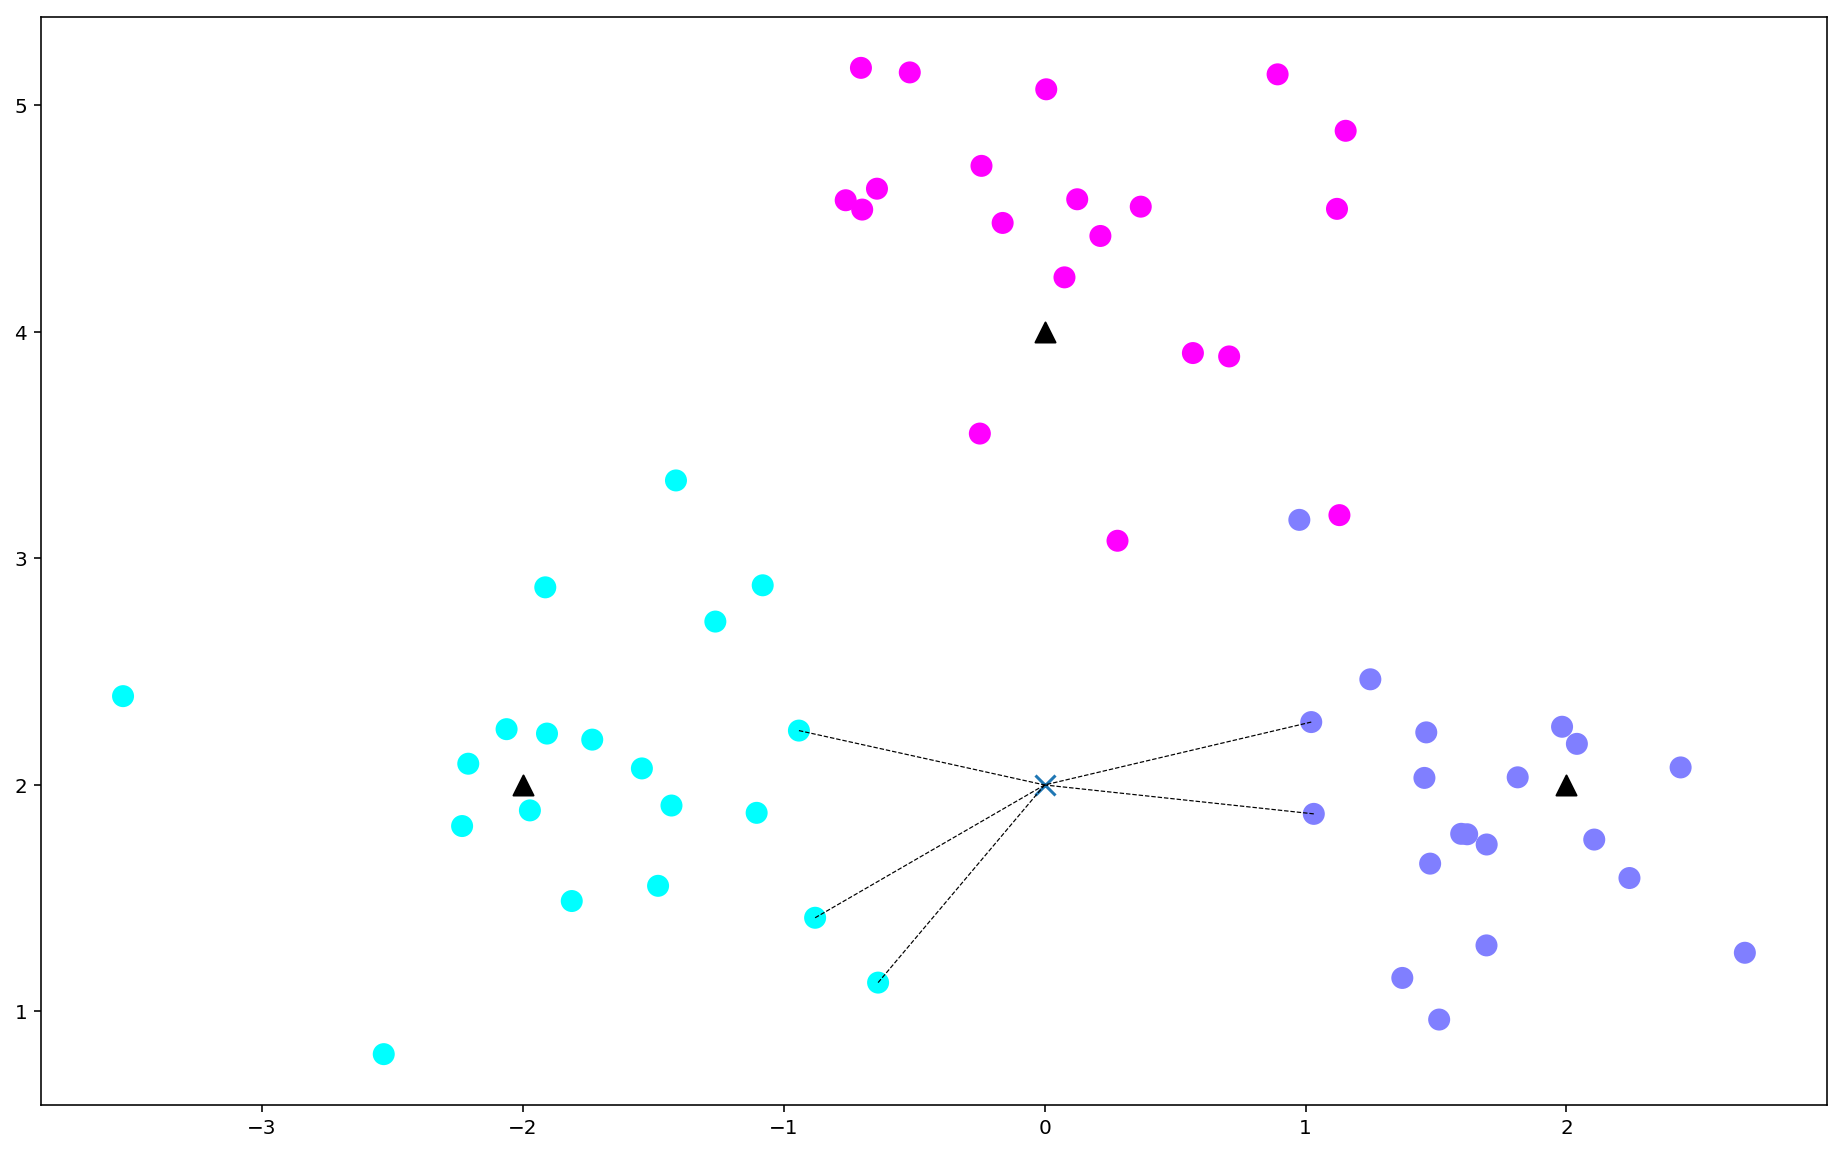

In [15]:
# 画出示意图
plt.figure(figsize=(16, 10), dpi=144)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='cool');    # 样本
plt.scatter(c[:, 0], c[:, 1], s=100, marker='^', c='k');   # 中心点
plt.scatter(X_sample[0][0], X_sample[0][1], marker="x", 
            s=100, cmap='cool')    # 待预测的点

for i in neighbors[0]:
    plt.plot([X[i][0], X_sample[0][0]], [X[i][1], X_sample[0][1]], 
             'k--', linewidth=0.6);    # 预测点与距离最近的 5 个样本的连线

### 回归算法

In [16]:
# 生成训练样本
n_dots = 40
X = 5 * np.random.rand(n_dots, 1)
y = np.cos(X).ravel()

# 添加一些噪声
y += 0.2 * np.random.rand(n_dots) - 0.1

In [17]:
# 训练模型
from sklearn.neighbors import KNeighborsRegressor
k = 5
knn = KNeighborsRegressor(k)
knn.fit(X, y);

In [18]:
# 生成足够密集的点并进行预测
T = np.linspace(0, 5, 500)[:, np.newaxis]
y_pred = knn.predict(T)
knn.score(X, y)

0.9856947811288386

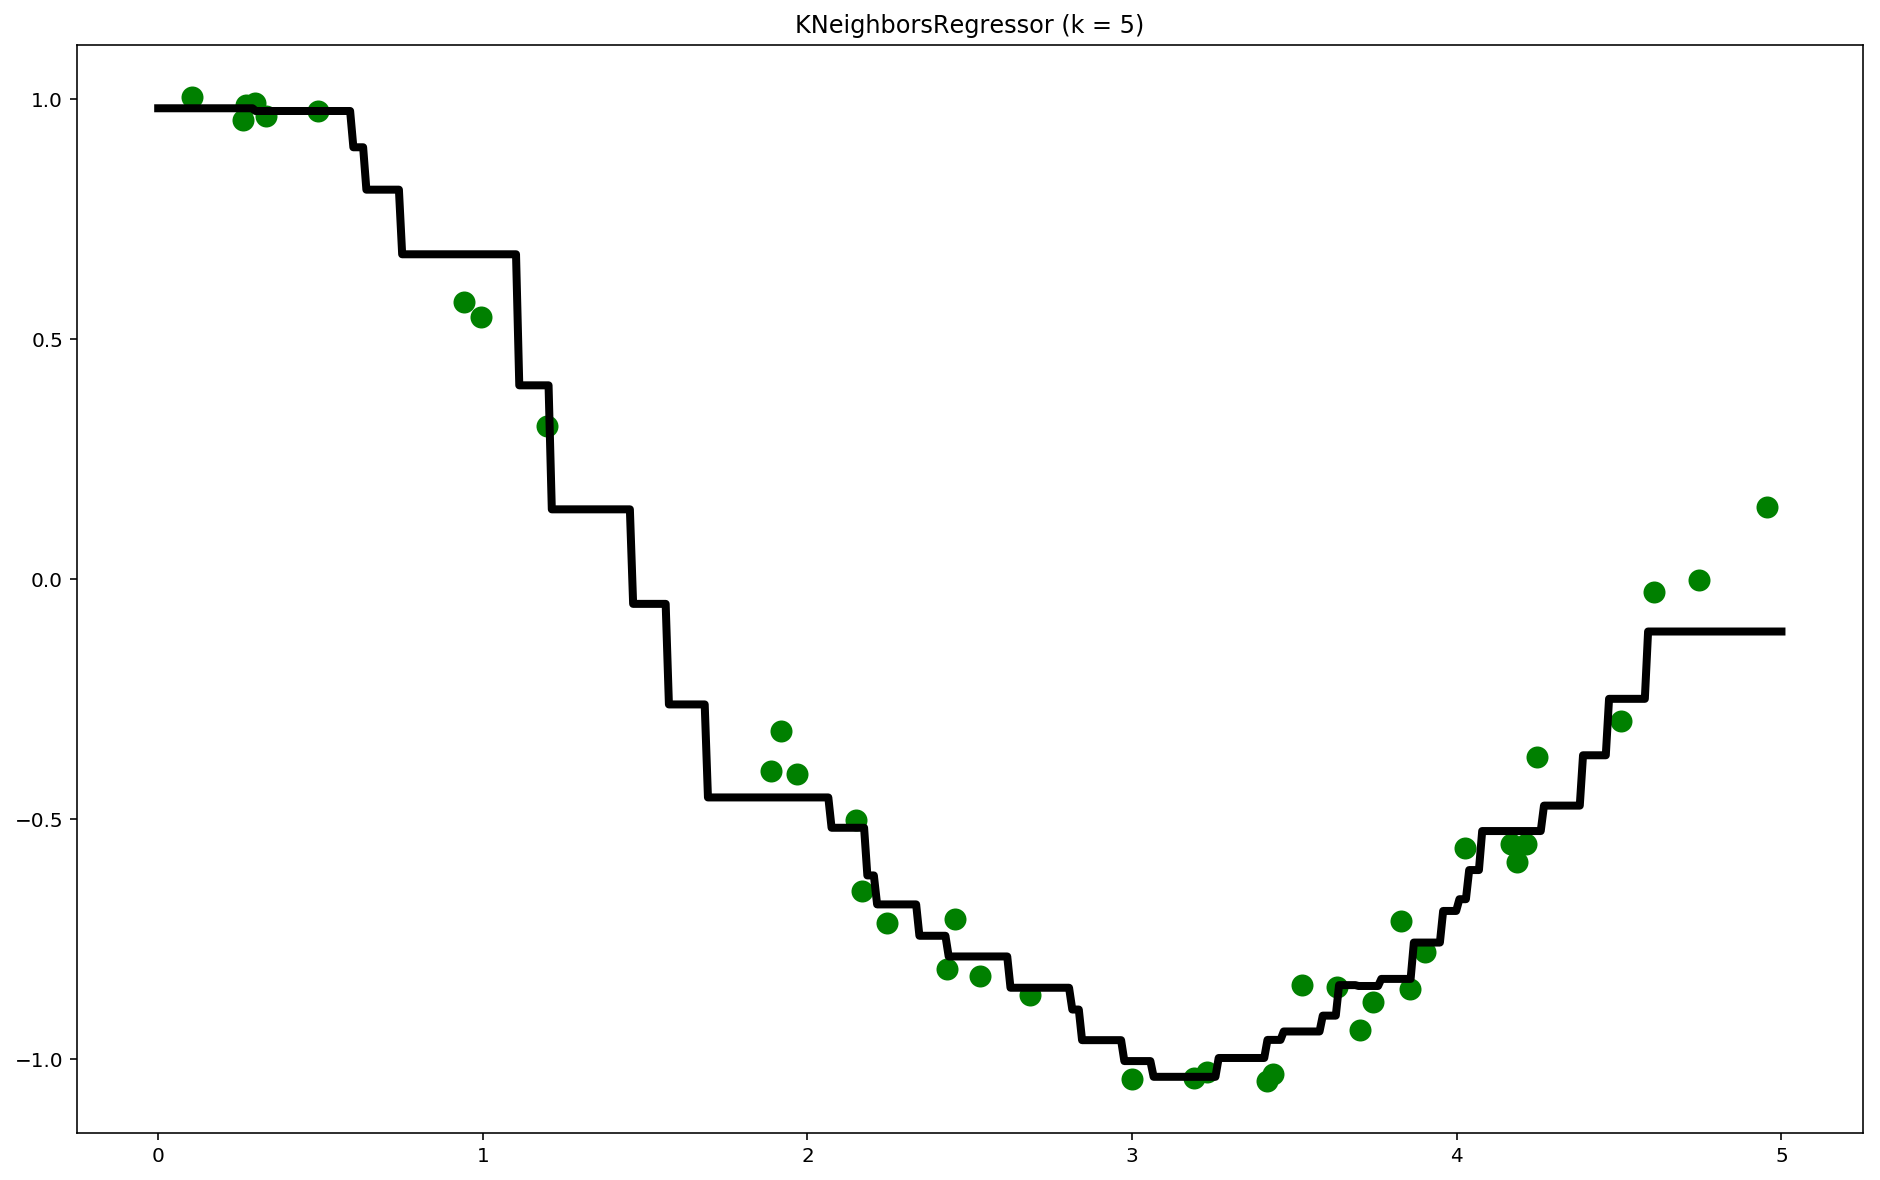

In [19]:
# 画出拟合曲线
plt.figure(figsize=(16, 10), dpi=144)
plt.scatter(X, y, c='g', label='data', s=100)         # 画出训练样本
plt.plot(T, y_pred, c='k', label='prediction', lw=4)  # 画出拟合曲线
plt.axis('tight')
plt.title("KNeighborsRegressor (k = %i)" % k)
plt.show()

## 糖尿病患者案例

In [20]:
import numpy as np
import pandas as pd

In [23]:
data = pd.read_csv('data/pima-indians-diabetes/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
X = data.iloc[:, 0:8]
Y = data.iloc[:, 8]

In [25]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [26]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=22)

In [28]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
738,2,99,60,17,160,36.6,0.453,21
178,5,143,78,0,0,45.0,0.190,47
185,7,194,68,28,0,35.9,0.745,41
647,0,179,50,36,159,37.8,0.455,22
654,1,106,70,28,135,34.2,0.142,22


In [29]:
Y_test.head()

645    0
767    0
31     1
148    0
59     0
Name: Outcome, dtype: int64

###  训练模型

In [31]:
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier

model1 = KNeighborsClassifier(n_neighbors=2)
model1.fit(X_train, Y_train)
score1 = model1.score(X_test, Y_test)

model2 = KNeighborsClassifier(n_neighbors=2, weights='distance')
model2.fit(X_train, Y_train)
score2 = model2.score(X_test, Y_test)

model3 = RadiusNeighborsClassifier(n_neighbors=2, radius=500.0)
model3.fit(X_train, Y_train)
score3 = model3.score(X_test, Y_test)

print(score1, score2, score3)

0.7142857142857143 0.7012987012987013 0.6493506493506493


In [32]:
from sklearn.model_selection import cross_val_score

result1 = cross_val_score(model1, X, Y, cv=10)
result2 = cross_val_score(model2, X, Y, cv=10)
result3 = cross_val_score(model3, X, Y, cv=10)

print(result1.mean(), result2.mean(), result3.mean())

0.7122351332877648 0.6796650717703349 0.6497607655502392


### 学习曲线

In [33]:
from sklearn.model_selection import learning_curve

train_size, train_score, test_score = learning_curve(model1, X, Y, cv=10, train_sizes=np.linspace(0.1, 1.0, 5))

In [34]:
train_size

array([ 69, 224, 380, 535, 691])

In [35]:
train_score

array([[0.7826087 , 0.76811594, 0.75362319, 0.75362319, 0.75362319,
        0.75362319, 0.75362319, 0.75362319, 0.75362319, 0.75362319],
       [0.82589286, 0.81696429, 0.80357143, 0.81696429, 0.8125    ,
        0.8125    , 0.8125    , 0.8125    , 0.8125    , 0.8125    ],
       [0.83421053, 0.83157895, 0.82105263, 0.83157895, 0.83157895,
        0.82368421, 0.81578947, 0.81578947, 0.81578947, 0.81578947],
       [0.85794393, 0.85607477, 0.85420561, 0.86542056, 0.85046729,
        0.8635514 , 0.84859813, 0.84485981, 0.84485981, 0.84485981],
       [0.84804631, 0.83936324, 0.84515195, 0.84515195, 0.829233  ,
        0.83936324, 0.82489146, 0.83068017, 0.84949349, 0.83936324]])

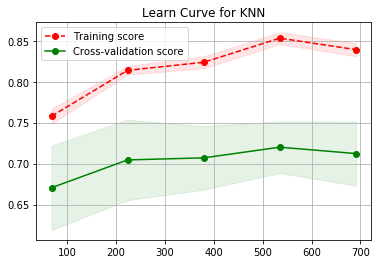

In [36]:
train_scores_mean = np.mean(train_score, axis=1)
train_scores_std = np.std(train_score, axis=1)
test_scores_mean = np.mean(test_score, axis=1)
test_scores_std = np.std(test_score, axis=1)

plt.fill_between(train_size, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_size, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_size, train_scores_mean, 'o--', color="r",
             label="Training score")
plt.plot(train_size, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.grid()
plt.title('Learn Curve for KNN')
plt.legend(loc="best")